<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Non-Negative Matrix Factorization

Estimated time needed: **45** minutes





You've been hired by a video streaming platform that specializes in kids content. The company would like to ensure that all content on the platform does not infringe on a copyright written material. The company has created an image database of copyrighted material, not only must you detect the same images you must detect similar images. Your  job is to come up with an image retrieval system to find the most similar image to each image in the provided dataset. Because your model is used for legal purposes it must be interpretable, this means it should be able to determine why the images are similar. As a result, you will use Non-Negative Matrix factorization since the factorized matrices can be interpreted as real images. You will use the [Anime Face Dataset](https://www.kaggle.com/datasets/splcher/animefacedataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) from kaggle.



<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/fake_cartoon.png" alt="cognitiveclass.ai logo">

<a href="https://www.piratesandprincesses.net/the-story-of-goodtimes-and-their-numerous-disney-knockoffs/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01"> image source</a>


## Table of Contents

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Background">Background</a>
        <ol>
               <li><a href="#What's a Non-Negative Matrix Fatorization?">What's a Non-Negative Matrix Fatorization?</a></li>
        </ol>
    </li>
  <li><a href="#Applying Non-Negative Matrix Factorization">Applying Non-Negative Matrix Factorization</a></li>
  <li><a href="#Image Retrieval System">Image Retrieval System</a></li>
   <li><a href="#Exercises">Exercises</a>
       <ol>
            <li><a href="#Exercise 1">Exercise 1</a></li>
            <li><a href="#Exercise 2">Exercise 2</a></li>
            <li><a href="#Exercise 3">Exercise 3</a></li>
            <li><a href="#Exercise 4">Exercise 4</a></li>
            <li><a href="#Exercise 5">Exercise 5</a></li>
        </ol>
    </li>
 </ol>    
     
    
     

## Objectives

After completing this lab you will be able to:

- __Understand__ Basics Matrix operations  such as Matrix addition  , Vector Multiplication，and Eigen decomposition

- __Apply__ Apply these Matrix operations using numpy


***


## Datasets

Download and unzip the **images** dataset:


In [ ]:
import skillsnetwork # Import thư viện skillsnetwork

await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/images.tar.gz", overwrite=True) # Tải xuống và giải nén tệp nén chứa ảnh. overwrite=True để ghi đè nếu tệp đã tồn tại.

  0%|          | 0/20006 [00:00<?, ?it/s]

Saved to '.'


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1 # Cài đặt các thư viện cần thiết. Dòng này được chú thích vì các thư viện đã được cài đặt sẵn.
# Note: If your environment doesn't support "!mamba install", use "!pip install" # Lưu ý: Nếu môi trường không hỗ trợ !mamba install, hãy sử dụng !pip install

you can use  <a href="https://www.sympy.org/en/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">SymPy </a>this to print matrices


In [ ]:
#!conda install -c anaconda sympy -y # Cài đặt thư viện sympy. Dòng này được chú thích.

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [ ]:
import warnings # Import thư viện cảnh báo
warnings.simplefilter('ignore') # Bỏ qua các cảnh báo đơn giản

import logging # Import thư viện ghi nhật ký
import numpy as np # Import thư viện numpy với bí danh np
import pandas as pd # Import thư viện pandas với bí danh pd
from numpy.random import RandomState # Import RandomState từ numpy.random
import matplotlib.pyplot as plt # Import thư viện matplotlib.pyplot với bí danh plt


from sklearn.decomposition import NMF # Import NMF từ sklearn.decomposition


from os import listdir,getcwd # Import listdir và getcwd từ os
from os.path import isfile, join # Import isfile và join từ os.path
from PIL import Image, ImageOps # Import Image và ImageOps từ PIL
import os # Import thư viện os

### Defining Helper Functions


Load train and test set:


In [ ]:
def get_data_matrix(test=False,Length=100,Width=100,mypath="images/"): # Định nghĩa hàm get_data_matrix để tải dữ liệu ảnh

    files = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f)) and f[0] != '.'] # Lấy danh sách các tệp ảnh trong thư mục
    if mypath + '/.DS_Store' in files: # Kiểm tra và xóa tệp .DS_Store nếu có
        files.remove(mypath + '/.DS_Store')

    if test: # Nếu là dữ liệu kiểm tra
        print("test data") # In ra "test data"
        files=files[9000:10000] # Lấy 1000 tệp cuối cùng cho dữ liệu kiểm tra

    else: # Nếu là dữ liệu huấn luyện
        print("training data") # In ra "training data"
        files=files[0:9000] # Lấy 9000 tệp đầu tiên cho dữ liệu huấn luyện

    print(len(files)) # In ra số lượng tệp
    X=np.zeros((len(files),Length*Width)) # Khởi tạo ma trận X với kích thước (số lượng tệp, Length * Width)
    for i,file in enumerate(files): # Lặp qua từng tệp
        img = Image.open(file).resize((Width, Length)) # Mở ảnh và thay đổi kích thước
        img =  ImageOps.grayscale(img) # Chuyển ảnh sang ảnh xám

        I=np.array(img) # Chuyển ảnh thành mảng numpy

        X[i,:]=I.reshape(1,-1) # Làm phẳng mảng ảnh và gán vào ma trận X
    return X # Trả về ma trận X

Plot image vectors:


In [ ]:
def reshape_row(x) : # Định nghĩa hàm reshape_row để hiển thị ảnh từ vector
    plt.imshow(x.reshape(Length,Width),cmap="gray") # Hiển thị ảnh sau khi định hình lại vector thành ma trận (Length x Width) với màu xám

This threshold function outputs an index if the input ```similar_distance``` is grater than or less than ```min_``` and ```max_```.


In [ ]:
def threshold(similar_distance,max_=0.1,min_=0): # Định nghĩa hàm threshold để lọc các chỉ số dựa trên khoảng cách tương tự
    dataset_index=np.where(np.logical_and(similar_distance>min_ ,similar_distance<max_))[0] # Lấy chỉ số của tập dữ liệu có khoảng cách nằm trong khoảng [min_, max_]
    query_index=similar_index[np.logical_and(similar_distance>min_ ,similar_distance<max_)] # Lấy chỉ số của truy vấn tương ứng
    return dataset_index,query_index # Trả về chỉ số của tập dữ liệu và truy vấn

Plot dataset images and query images, ```X``` and ```X_q``` are global variables.


In [ ]:
def plot_data_query(dataset_index,query_index,N): # Định nghĩa hàm plot_data_query để vẽ các cặp ảnh từ tập dữ liệu và truy vấn
    for data_sample,query_sample in zip(dataset_index[0:N],query_index[0:N]): # Lặp qua N cặp chỉ số đầu tiên

        plt.figure(figsize=(10,4)) # Tạo một figure mới với kích thước 10x4
        plt.subplot(1,2,1) # Tạo subplot 1x2, chọn vị trí 1
        reshape_row(X[data_sample]) # Vẽ ảnh từ tập dữ liệu
        plt.title("dataset sample {}".format(data_sample)) # Đặt tiêu đề cho ảnh tập dữ liệu
        plt.subplot(1,2,2) # Chọn vị trí 2
        reshape_row(X_q[query_sample]) # Vẽ ảnh từ truy vấn
        plt.title("query sample match {}".format(query_sample)) # Đặt tiêu đề cho ảnh truy vấn
        plt.show() # Hiển thị figure

        print("-----------------------------------------------------") # In ra dấu phân cách

## Background


### What's a Non-Negative Matrix Factorization?


In Non-Negative Matrix Factorization (NNMF) sometimes called non-negative matrix approximation, a $N x D$ matrix $\mathbf{X}$, where $N$ is the number of samples and $D$ is the dimension of features, contains all non-negative values. In NNMF we construct a non-negative  approximation of $\mathbf{X}$, $\mathbf{\hat{X}}$ such that $\mathbf{\hat{X}}$ is a product of two non-negative matrices $\mathbf{W}$ and $\mathbf{H}$, i.e:

$$\mathbf{\hat{X}}=\mathbf{WH}$$

where the $r$ rows of $\mathbf{H}$ are called the basis, and we are going to represent the matrix $\mathbf{X}$ in terms of this basis.

Each row of $\mathbf{W}$, ${w}_i$ is called an encoding of the corresponding ${x}_i$ in $\mathbf{X}$, which represents "how much" of each basis in $\mathbf{H}$ is to represent ${x}_i$. ${\hat{x}_i}$ is thus a linear combination of the rows of $\mathbf{H}$.


## Applying Non-Negative Matrix Factorization


**Image retrieval** is used for searching and retrieving images from a large database of digital images. Here we would like to find identical or similar  animated faces  for copyright reasons.


Consider the matrix $\mathbf{X}$ where each row is a flattened $100\times 100$ image.


In [ ]:
Length,Width=100,100 # Đặt chiều dài và chiều rộng của ảnh
X=get_data_matrix(test=False,Length=100,Width=100,mypath="images") # Tải dữ liệu huấn luyện
X.shape # In ra kích thước của ma trận X

training data
9000


(9000, 10000)

We can apply ```sklearn.decomposition.NMF``` to obtain the  non-negative matrices, i.e. matrices with all non-negative elements, $(\mathbf{W}$, $\mathbf{H})$ whose product approximates the non-negative matrix $\mathbf{X}$.

Consider the following parameters when building a simple NMF object:

```n_components```: int; Number of components, if n_components is not set all features are kept.

```tolfloat```: default=1e-4; Tolerance of the stopping condition.

```max_iter```: int, (default=200); Maximum number of iterations before timing out.


Let's select a number of components or basis, namely $r$, for the matrix representation.


In [ ]:
n_components=10 # Đặt số lượng thành phần (basis) cho NMF

Initialize our NMF object and fit it to $\mathbf{X}$:


In [ ]:
nmf_estimator = NMF(n_components=n_components, tol=5e-3,max_iter=2000) # Khởi tạo đối tượng NMF với số lượng thành phần, dung sai và số lần lặp tối đa
nmf_estimator.fit(X)  # original non- negative dataset # Huấn luyện mô hình NMF trên tập dữ liệu X

NMF(max_iter=2000, n_components=10, tol=0.005)

The **.components_** method returns the basis found:


In [ ]:
H = nmf_estimator.components_ # Lấy các thành phần (basis) từ mô hình NMF đã huấn luyện

We can reshape the obtained 10 basis into images, and they appear like faces in the dataset:


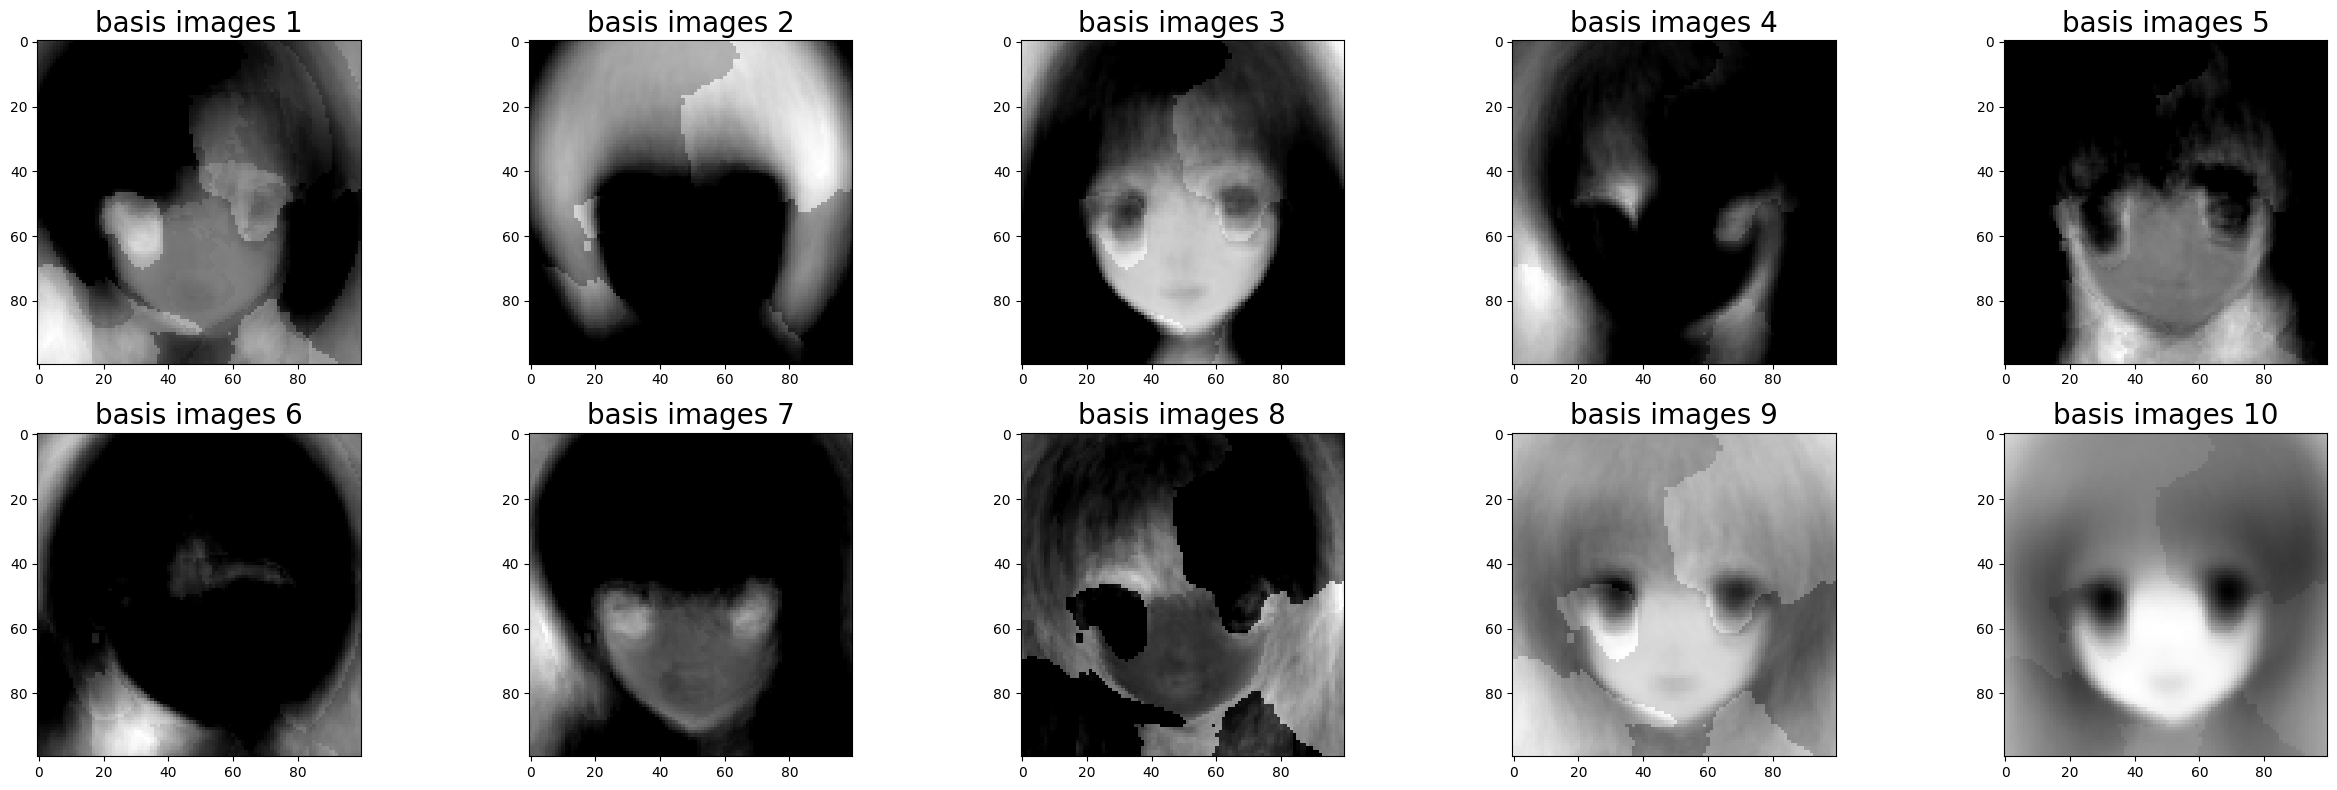

In [ ]:
plt.figure(figsize=(25, 8)) # Tạo một figure mới với kích thước 25x8

for i,h in enumerate(H): # Lặp qua từng basis trong H
    plt.subplot(2, 5, i+1) # Tạo subplot 2x5, chọn vị trí i+1
    reshape_row(h) # Vẽ ảnh từ basis
    plt.title("basis images {}".format(str(i+1)), fontsize=20) # Đặt tiêu đề cho ảnh basis với kích thước font 20

plt.tight_layout() # Tự động điều chỉnh khoảng cách giữa các subplot

We can obtain the encodings of all the images using the **transform** method of the fitted **nmf_estimator**:


In [ ]:
W = nmf_estimator.transform(X) # Biến đổi ma trận X sử dụng mô hình NMF để lấy ma trận mã hóa W

For each of the 9000 images we have an encoding of dimension 10:


In [ ]:
W.shape # In ra kích thước của ma trận mã hóa W

(9000, 10)

The encoding tells you the projection of each image in $\mathbf{X}$ on a particular basis. Here we plot out the encoding magnitude for the $i$th image on each basis.


Text(0.5, 1.0, 'encodings for image 1 ')

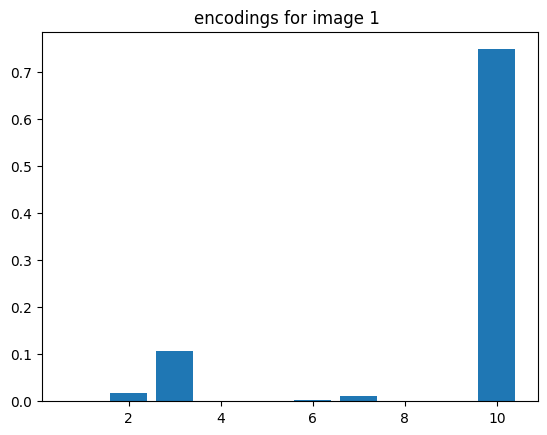

In [ ]:
i=0 # Chọn chỉ số của ảnh đầu tiên
w=W[i,:] # Lấy vector mã hóa của ảnh đầu tiên từ ma trận W

plt.bar([n+1 for n in range(len(w))],w) # Vẽ biểu đồ cột biểu diễn độ lớn của từng thành phần trong vector mã hóa
plt.title("encodings for image {} ".format (i+1)) # Đặt tiêu đề cho biểu đồ

We see that for image 1, the second encoding has the highest magnitude, thus we can plot out the basis associated with this encoding (i.e, the second basis) and see that it's very similar to the image. The 9th encoding has a small magnitude, we see the associated basis looks nothing like the image:


Text(0.5, 1.0, 'Dissimilar basis 9')

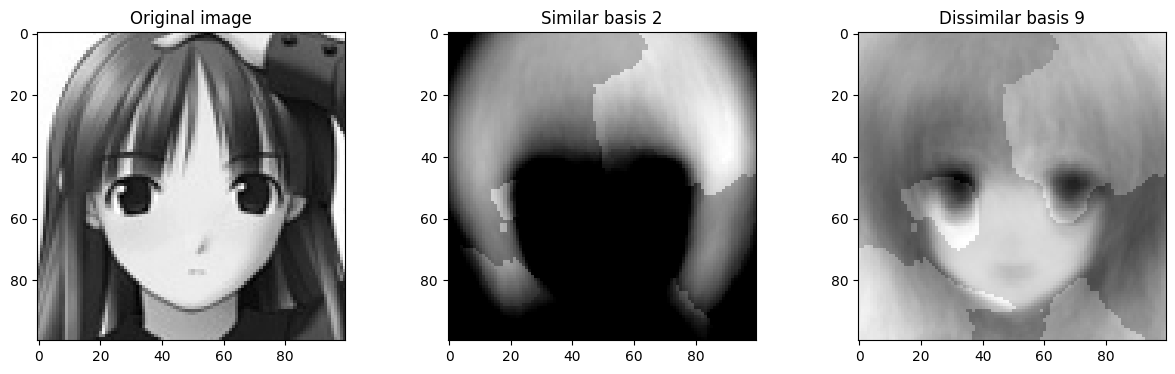

In [ ]:
plt.figure(figsize=(15,4)) # Tạo một figure mới với kích thước 15x4

plt.subplot(131) # Tạo subplot 1x3, chọn vị trí 1
reshape_row(X[i,:]) # Vẽ ảnh gốc
plt.title("Original image") # Đặt tiêu đề "Original image"

plt.subplot(132) # Chọn vị trí 2
reshape_row(H[1,:]) # Vẽ basis thứ 2
plt.title("Similar basis 2") # Đặt tiêu đề "Similar basis 2"

plt.subplot(133) # Chọn vị trí 3
reshape_row(H[8,:]) # Vẽ basis thứ 9
plt.title("Dissimilar basis 9") # Đặt tiêu đề "Dissimilar basis 9"

We can perform the inverse transform using the method **inverse_transform** to get $\mathbf{\hat{X}}$, the approximation of $\mathbf{X}$:


In [ ]:
Xhat=nmf_estimator.inverse_transform(W) # Thực hiện biến đổi ngược từ ma trận mã hóa W và các basis để tái tạo lại ma trận ảnh Xhat

Each row of $\mathbf{\hat{X}}$ corresponds to an image. We can reshape the row into an image and plot the approximations:


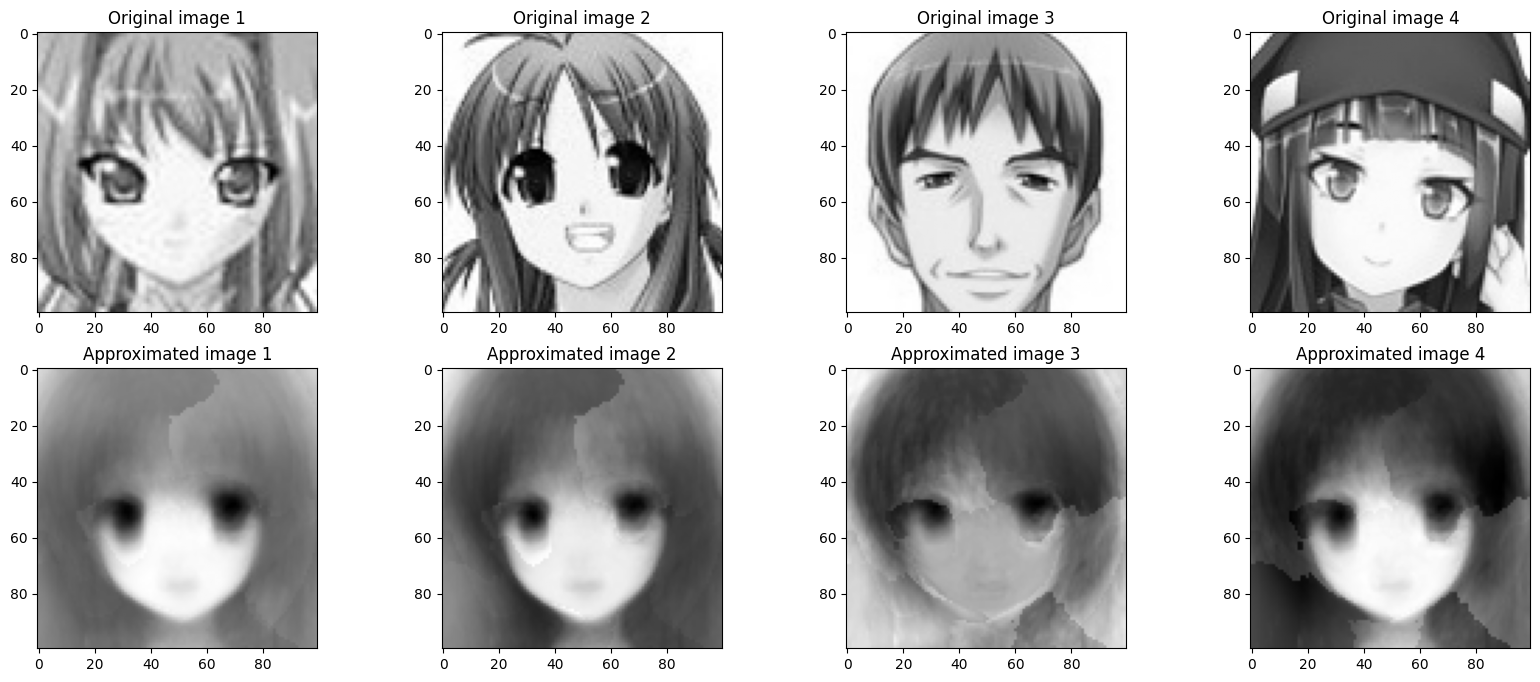

In [ ]:
plt.figure(figsize=(20,8)) # Tạo một figure mới với kích thước 20x8

for i in range(1,5): # Lặp qua 4 ảnh đầu tiên (từ chỉ số 1 đến 4)
    plt.subplot(2,4,i) # Tạo subplot 2x4, chọn vị trí i
    reshape_row(X[i]) # Vẽ ảnh gốc
    plt.title(f"Original image {i}") # Đặt tiêu đề cho ảnh gốc

    plt.subplot(2,4,i+4) # Chọn vị trí i+4
    reshape_row(Xhat[i]) # Vẽ ảnh được tái tạo
    plt.title(f"Approximated image {i}") # Đặt tiêu đề cho ảnh được tái tạo

We can verify that the scikit-learn's **inverse_transform** method essentially performs the following matrix operation:


In [ ]:
Xhat_M=W@H # Thực hiện phép nhân ma trận W và H để tái tạo lại ma trận ảnh Xhat_M

We see the results are identical quantitatively (for the first 10 grayscale values of first image):


In [ ]:
Xhat[0,:10], Xhat_M[0,:10] # So sánh 10 giá trị đầu tiên của ảnh được tái tạo bằng hai phương pháp khác nhau (inverse_transform và nhân ma trận)

(array([237.04602076, 234.9320373 , 232.85921732, 229.87078583,
        226.33610003, 222.78334362, 217.54444621, 212.67961251,
        207.57299517, 201.75848913]),
 array([237.04602076, 234.9320373 , 232.85921732, 229.87078583,
        226.33610003, 222.78334362, 217.54444621, 212.67961251,
        207.57299517, 201.75848913]))

and qualitatively or visually for the second to fifth image in the dataset:


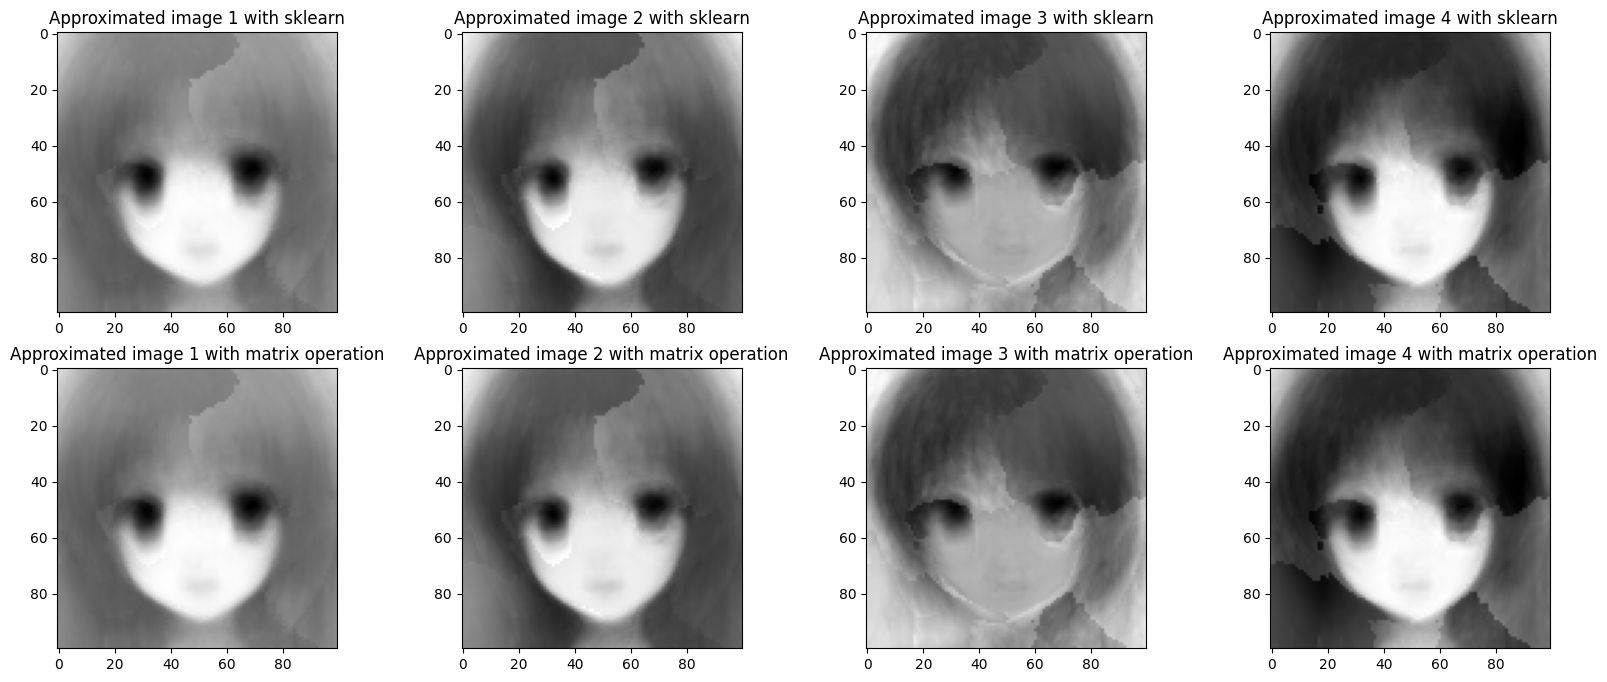

In [ ]:
plt.figure(figsize=(20,8)) # Tạo một figure mới với kích thước 20x8

for i in range(1,5): # Lặp qua 4 ảnh đầu tiên (từ chỉ số 1 đến 4)
    plt.subplot(2,4,i) # Tạo subplot 2x4, chọn vị trí i
    reshape_row(Xhat[i]) # Vẽ ảnh được tái tạo bằng inverse_transform
    plt.title(f"Approximated image {i} with sklearn") # Đặt tiêu đề

    plt.subplot(2,4,i+4) # Chọn vị trí i+4
    reshape_row(Xhat_M[i]) # Vẽ ảnh được tái tạo bằng nhân ma trận
    plt.title(f"Approximated image {i} with matrix operation") # Đặt tiêu đề

We can reconstruct the image by adding one component multiplied by it's encoding at a time. This is shown in the following lines of code, as each successive component is added we see the image looks more and more like it's approximation:


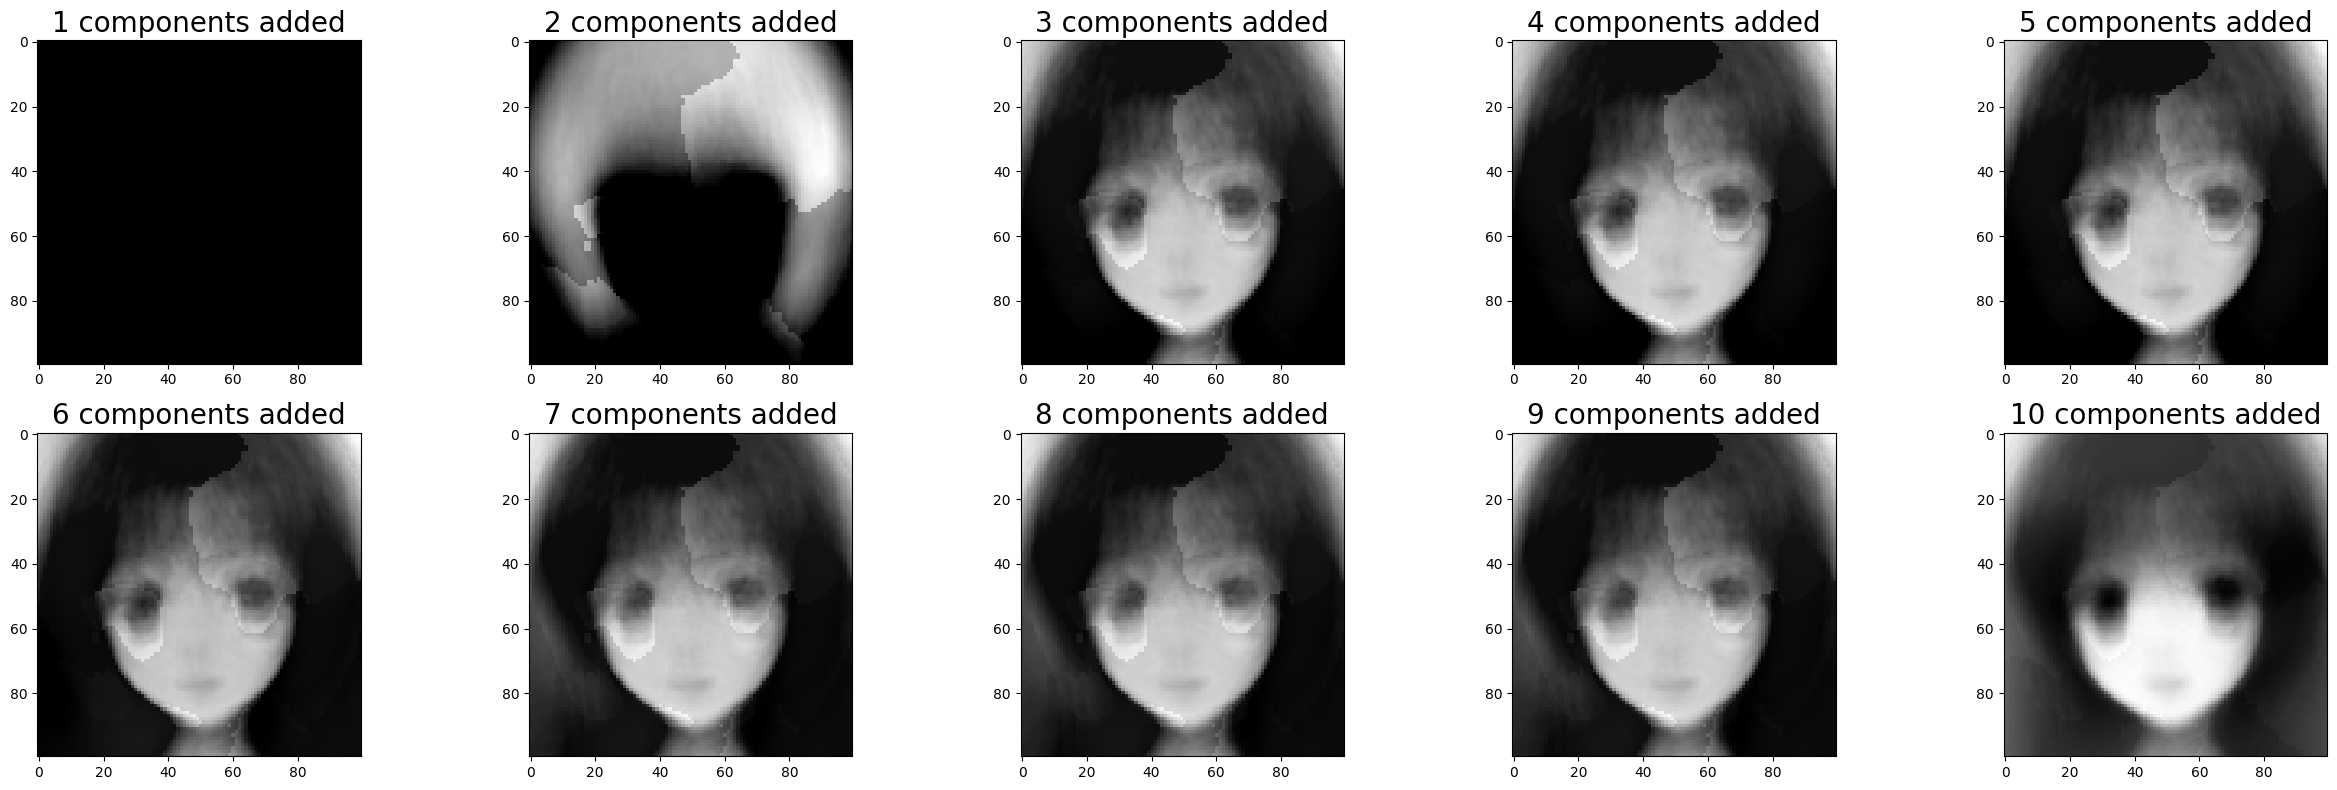

In [ ]:
# initialize an image array with 10000 zeros which will be reshaped as 100x100
image=np.zeros((1,10000)) # Khởi tạo một mảng ảnh với 10000 số 0, sẽ được định hình lại thành 100x100

plt.figure(figsize=(25,8)) # Tạo một figure mới với kích thước 25x8
for i, (w_, h) in enumerate(zip(w, H)): # Lặp qua từng thành phần mã hóa và basis

    # w is the encoding vector of the first image in X
    # reconstruction of the image is a linear combination of H
    plt.subplot(2,5,i+1) # Tạo subplot 2x5, chọn vị trí i+1
    image += w_*h # Cộng thêm tích của thành phần mã hóa và basis vào ảnh
    reshape_row(image) # Vẽ ảnh hiện tại
    plt.title(f"{i+1} components added", fontsize=20) # Đặt tiêu đề cho ảnh với số lượng thành phần đã thêm
plt.tight_layout() # Tự động điều chỉnh khoảng cách giữa các subplot

## Image Retrieval System


An image retrieval system is a system used for browsing, searching and retrieving images from a large database of digital images. In this section we will create an image retrieval system to find similar cartoon characters for copyright infringement.

We define the query dataset as the set of 1000 images. If these images are similar to the images in our original dataset, they may be considered as copyright infringement. We load the query dateset into```X_q``` where each row corresponds to a flattened $100\times 100$ image:


In [ ]:
X_q=get_data_matrix(test=True,Length=100,Width=100,mypath="images") # Tải dữ liệu truy vấn
X_q.shape # In ra kích thước của ma trận X_q

test data
1000


(1000, 10000)

The code in the next cell helps us retain much of the important information of the query images and reduces factors that make similar images appear differently such as noise, rotation and scale. In addition, the code results in a matrix `W_q` that requires less computation for calculating the distance metrics. As such we will use the code to find the similar images.


In [ ]:
W_q=nmf_estimator.transform(X_q) # Biến đổi ma trận X_q sử dụng mô hình NMF đã huấn luyện để lấy ma trận mã hóa W_q
W_q.shape # In ra kích thước của ma trận W_q

(1000, 10)

We define  the  distance matrix as a  matrix ```D``` containing the distances, taken pairwise, between the elements of the query dataset and the original dataset.  We will use the cosine similarity that computes the normalized dot product of vectors. That is, for $x$ and $x'$ their cosine similarity  is defined as:

$$1-\frac{x' x^T}{\|x'\| \|x\|}$$


Consider the following set of codes in which case that we represent as 2D vectors.  The original  dataset is in yellow and the query dataset is in blue. We see that the image $h_2$ is nearest  to  $h_{2q}$, and similarly image $h_3$ is nearest  to  $h_{1q}$.



<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/NNMF_vectors.png" width="500" alt="https://pxhere.com/en/photo/1536663">


The resultant distance Matrix is shown below, each row consists of a dataset sample and each column consists of a query dataset sample. Each element of the distance Matrix comprises of the distance between the sample of that particular row and that particular column. We see in this case samples that are close together have the smallest  value. For example, image $h_2$  in the second row is nearest to $h_{2q}$ in the second column.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/Sim_Matix.png" width="500" alt="https://pxhere.com/en/photo/1536663">


We will use the function ```pairwise_distances``` from scikit-learn. This method takes either a vector array or a distance matrix, and returns a distance matrix. If the input is a vector array, the distances are computed.


In [ ]:
from sklearn.metrics import pairwise_distances # Import hàm pairwise_distances từ sklearn.metrics

In [ ]:
# calculates the pairwise distance between the NNMF encoded version of
# the original dataset W and the encoded version of the query dataset W_q
D=pairwise_distances(W,W_q,metric='cosine') # Tính ma trận khoảng cách pairwise giữa W và W_q sử dụng metric cosine

We see the number of rows corresponds to the number of samples in the original dataset and the number of columns  corresponds to the number of samples in the query dateset.


In [ ]:
D.shape # In ra kích thước của ma trận khoảng cách D

(9000, 1000)

For each sample in the dataset we find the query sample that has the smallest distance to it, which would be the most similar image. As each image in the original dataset corresponds to a row in the distance matrix, the column index with smallest value corresponds to the index of the closest image in the query dataset.


In [ ]:
similar_index=np.argmin(D, axis=1) # Tìm chỉ số cột có giá trị nhỏ nhất trong mỗi hàng của ma trận khoảng cách D (tức là chỉ số của ảnh truy vấn gần nhất với mỗi ảnh trong tập dữ liệu gốc)

We also find the corresponding distance value


In [ ]:
similar_distance=np.min(D, axis=1) # Tìm giá trị nhỏ nhất trong mỗi hàng của ma trận khoảng cách D (tức là khoảng cách nhỏ nhất giữa mỗi ảnh trong tập dữ liệu gốc và ảnh truy vấn gần nhất)

We plot out the distance values in a histogram; we see the values range from zero to approximately 0.06.


Text(0.5, 1.0, 'Distance values')

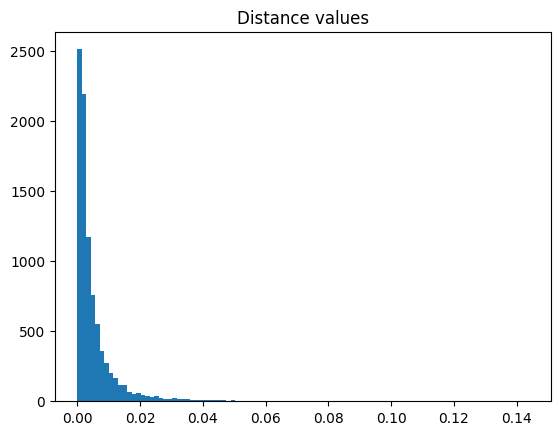

In [ ]:
plt.hist(similar_distance,bins=100) # Vẽ biểu đồ histogram của các giá trị khoảng cách tương tự
plt.title("Distance values") # Đặt tiêu đề "Distance values" cho biểu đồ

If we try a maximum threshold of $1.0x10^{-5}$ for the distance value for the first five samples, we get identical images


In [ ]:
dataset_index,query_index=threshold(similar_distance,max_=0.00001,min_=0) # Lọc các chỉ số của tập dữ liệu và truy vấn có khoảng cách nhỏ hơn hoặc bằng 0.00001

In [ ]:
dataset_index.shape, query_index.shape # In ra kích thước của mảng chỉ số tập dữ liệu và mảng chỉ số truy vấn

((49,), (49,))

In [ ]:
dataset_index[:10] # In ra 10 chỉ số đầu tiên của tập dữ liệu

array([ 374,  538,  924, 1186, 1282, 1461, 1493, 1672, 2021, 2054])

In [ ]:
query_index[:10] # In ra 10 chỉ số đầu tiên của truy vấn

array([ 10,   8, 684, 962,  78, 333, 199, 333, 987, 871])

If we try a threshold of between $5.0x10^{-3}$ and $1.0x10^{-2}$ instead and plot out the first five samples, it is evident the many of the query images are very different from the original.


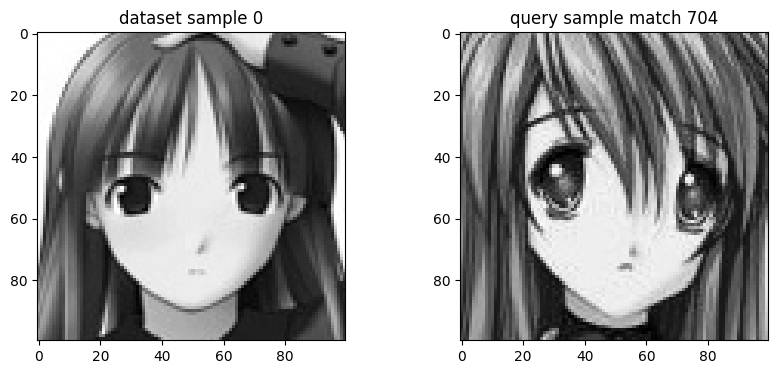

-----------------------------------------------------


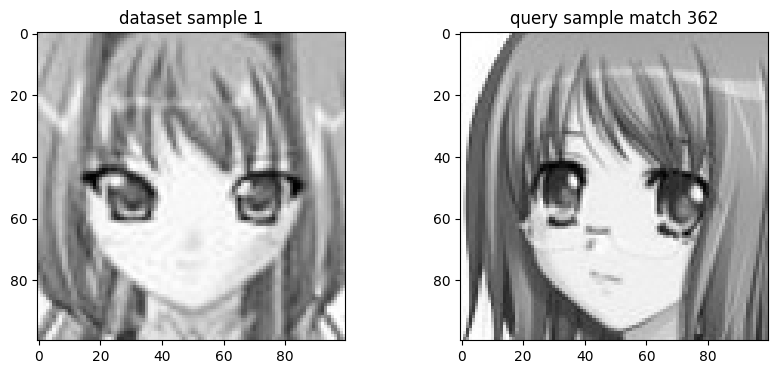

-----------------------------------------------------


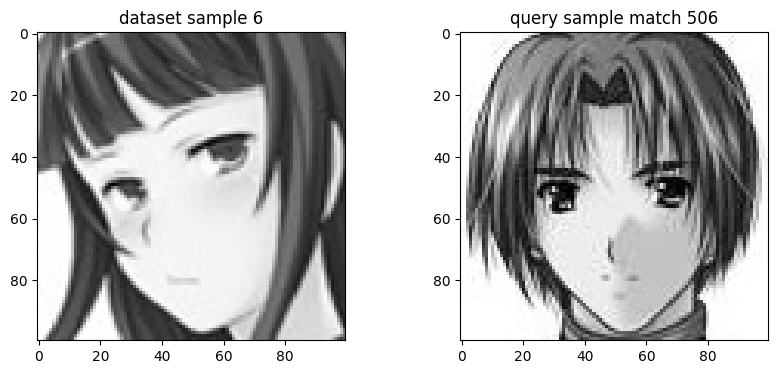

-----------------------------------------------------


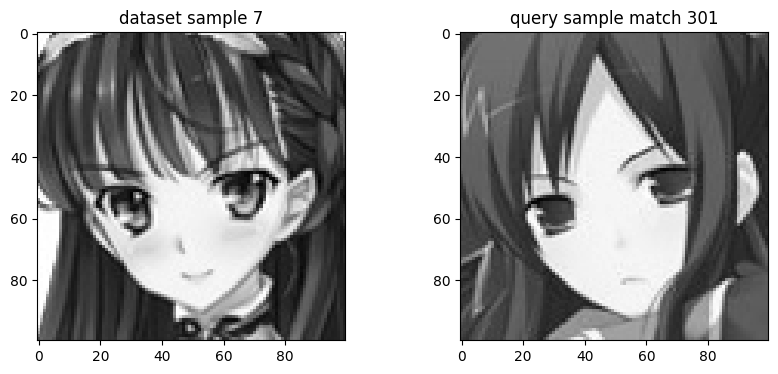

-----------------------------------------------------


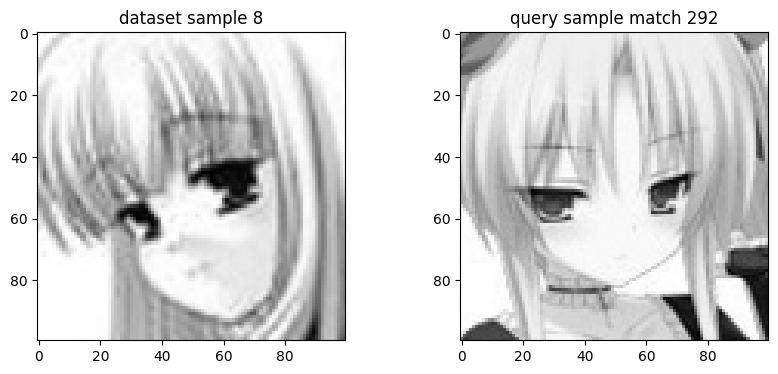

-----------------------------------------------------


In [ ]:
dataset_index,query_index=threshold(similar_distance,max_=0.005,min_=0.00001) # Lọc các chỉ số của tập dữ liệu và truy vấn có khoảng cách trong khoảng [0.00001, 0.005]
plot_data_query(dataset_index,query_index,5) # Vẽ 5 cặp ảnh đầu tiên từ tập dữ liệu và truy vấn

## Exercises


In this exercise, you will apply NMF on the [face images](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py) from scikit-learn and perform an image retrievel task to find pairs of faces that are similar.


In [ ]:
from sklearn.datasets import fetch_olivetti_faces # Import hàm fetch_olivetti_faces từ sklearn.datasets

rng = RandomState(0) # Khởi tạo trình tạo số ngẫu nhiên
data = fetch_olivetti_faces(shuffle=True, random_state=rng) # Tải tập dữ liệu Olivetti faces, xáo trộn và sử dụng random_state đã khởi tạo
X = data.images # Lấy dữ liệu ảnh

In [ ]:
image_shape = (64, 64) # Đặt kích thước ảnh

def plot_faces(title, images, n_col, n_row, cmap=plt.cm.gray): # Định nghĩa hàm plot_faces để vẽ nhiều ảnh
    fig, axs = plt.subplots( # Tạo figure và axes
        nrows = n_row, # Số hàng
        ncols = n_col, # Số cột
        figsize = (2.0*n_col, 2.3*n_row), # Kích thước figure
        facecolor='white', # Màu nền figure
        constrained_layout=True) # Sử dụng constrained layout

    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0) # Đặt khoảng cách giữa các subplot
    fig.set_edgecolor("black") # Đặt màu viền figure
    fig.suptitle(title, size=16) # Đặt tiêu đề chính cho figure
    for ax, vec in zip(axs.flat, images): # Lặp qua từng axes và ảnh
        vmax = max(vec.max(), -vec.min()) # Tính giá trị vmax
        im = ax.imshow( # Hiển thị ảnh
            vec.reshape(image_shape), # Định hình lại vector ảnh thành ma trận
            cmap=cmap, # Bản đồ màu
            interpolation="nearest", # Phương pháp nội suy
            vmin=-vmax, # Giá trị vmin
            vmax=vmax) # Giá trị vmax
        ax.axis('off') # Tắt trục

    fig.colorbar(im, ax=axs, orientation='horizontal', shrink=0.99, # Thêm colorbar
                aspect=40, pad=0.01) # Các tham số cho colorbar
    plt.show() # Hiển thị figure

We use the **plot_faces** function to plot the first 6 faces in the dataset.


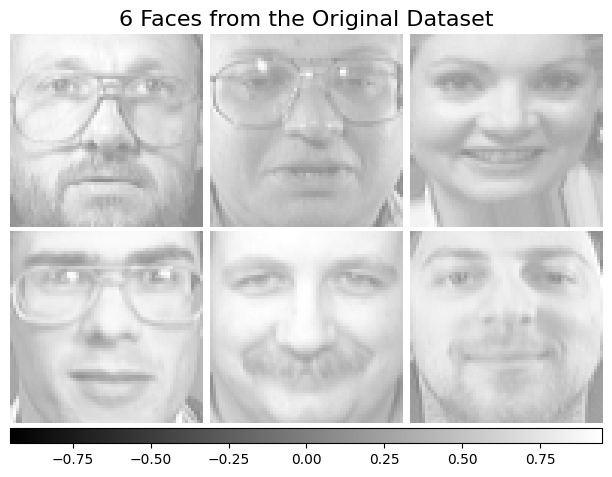

In [ ]:
plot_faces("6 Faces from the Original Dataset", X[:6], 3, 2) # Vẽ 6 ảnh đầu tiên từ tập dữ liệu gốc

### Exercise 1

Split the dataset into two such that the first 300 is used as the original dataset **X_r** and the remaining 100 is used as the query dataset **X_q**. Initialize a NMF instance with n_components = 10, and use it to transform **X_r** and **X_q** into encodings.


In [ ]:
X_r = X[:300].reshape((300, 64*64)) # Lấy 300 ảnh đầu tiên làm tập dữ liệu gốc và định hình lại
X_q = X[300:].reshape((100, 64*64)) # Lấy 100 ảnh còn lại làm tập dữ liệu truy vấn và định hình lại

nmf = NMF(n_components=10, tol=5e-3,max_iter=2000) # Khởi tạo đối tượng NMF với 10 thành phần, dung sai và số lần lặp tối đa
X_r_W = nmf.fit_transform(X_r) # Huấn luyện mô hình NMF trên X_r và biến đổi X_r để lấy ma trận mã hóa X_r_W
X_q_W = nmf.fit_transform(X_q) # Biến đổi X_q sử dụng mô hình NMF đã huấn luyện trên X_r để lấy ma trận mã hóa X_q_W

<details>
    <summary>Click here for Solution</summary>

```python
nmf = NMF(n_components=6, tol=5e-3,max_iter=2000)
nmf.fit(X)
```

</details>


### Exercise 2

Calculate the pairwise distances between face encodings from the original and query dataset, store the result in **D**.


In [ ]:
from sklearn.metrics import pairwise_distances # Import hàm pairwise_distances

D = pairwise_distances(X_r_W, X_q_W, metric='cosine') # Tính ma trận khoảng cách pairwise giữa X_r_W và X_q_W sử dụng metric cosine

<details>
    <summary>Click here for Solution</summary>

```python
H = nmf.components_
plot_faces("Basis from dataset", H, 3, 2)
```

</details>


### Exercise 3

For all rows in the pairwise distance matrix, output their smallest distances as **similar_distance**, and the index associated with the smallest distances as **similar_index**.


In [ ]:
similar_index = np.argmin(D, axis=1) # Tìm chỉ số cột có giá trị nhỏ nhất trong mỗi hàng của ma trận khoảng cách D
similar_distance = np.min(D, axis=1) # Tìm giá trị nhỏ nhất trong mỗi hàng của ma trận khoảng cách D

<details>
    <summary>Click here for Solution</summary>

```python
W = nmf.transform(X)
w6 = W[:6, :] # picking the first 6 encodings

X_hat = nmf.inverse_transform(w6)
plot_faces("6 Reconstructed faces using inverse_transform", X_hat, 3, 2)

```

</details>


### Exercise 4

Use the **similar_distance** as input for the **threshold** function. You can specify the min and max threshold for the distances. Return the index of the original dataset and the query dataset that satisfy the specified threshold. Use **plot_data_query** to plot the first 5 pairs of face images that our image retrieval system "views" as similar.


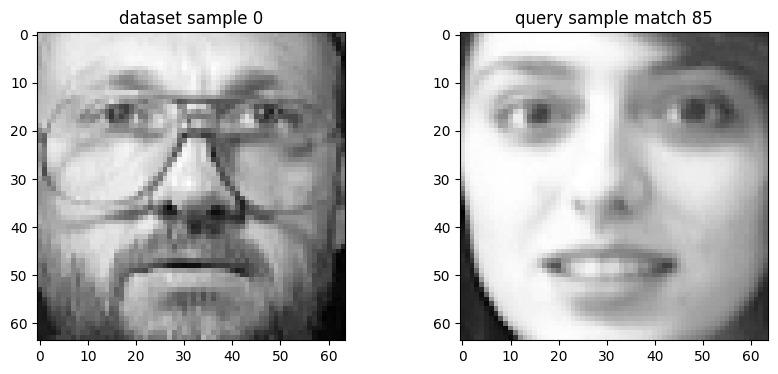

-----------------------------------------------------


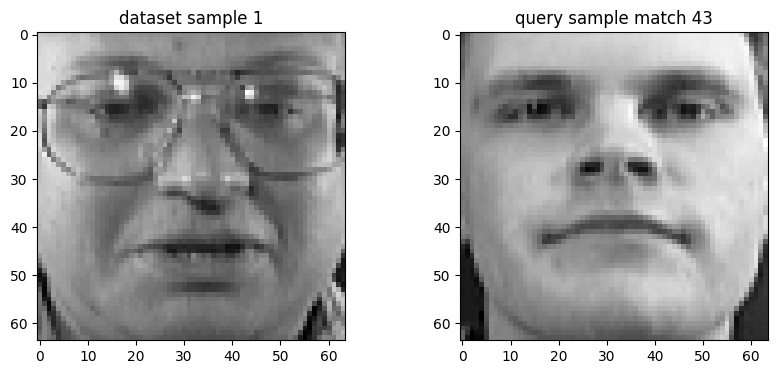

-----------------------------------------------------


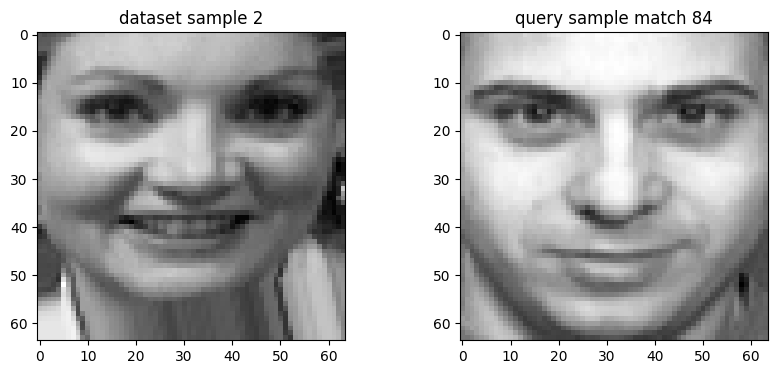

-----------------------------------------------------


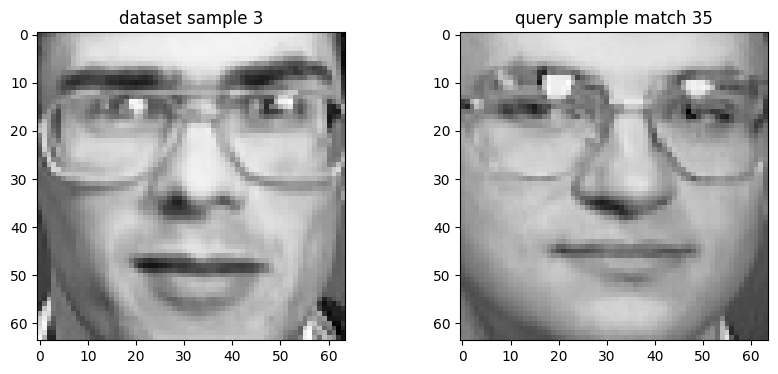

-----------------------------------------------------


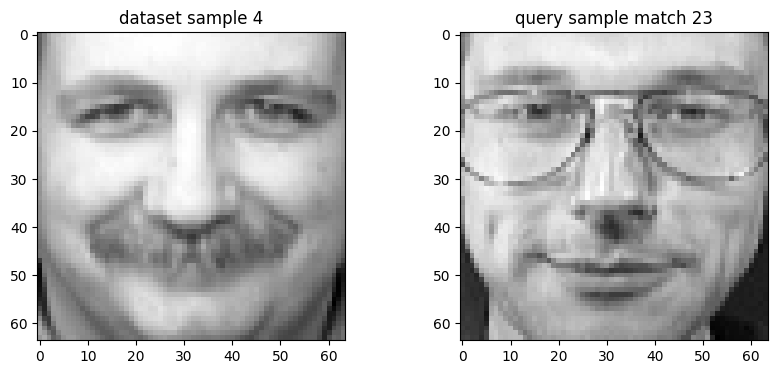

-----------------------------------------------------


In [ ]:
o_index, q_index = threshold(similar_distance) # Sử dụng hàm threshold để lọc các chỉ số dựa trên khoảng cách tương tự

Length=64 # Cập nhật lại chiều dài và chiều rộng cho hàm reshape_row
Width=64
plot_data_query(o_index, q_index, 5) # Vẽ 5 cặp ảnh đầu tiên từ tập dữ liệu gốc và truy vấn dựa trên các chỉ số đã lọc

<details>
    <summary>Click here for Solution</summary>

```python
X_hat_M = w6@H
plot_faces("6 Reconstructed faces using matrix operations", X_hat_M, 3,2)
print("-------------------------------------------------------")
plot_faces("6 Reconstructed faces using inverse_transform", X_hat, 3, 2)
```

</details>


# Congratulations! - You have completed the lab


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Joseph Santarcangelo</a> Joseph has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By  | Change Description             |
| ----------------- | ------- | ----------- | ------------------------------ |
| 2022-03-25        | 0.1     | Joseph S.   | Updated all content            |
| 2022-04-26        | 0.1     | Svitlana K. | Corrected minor grammar errors |
| 2022-06-06        | 0.1     | Roxanne Li  | Review and edit content        |
